<a href="https://colab.research.google.com/github/Jash-Bhatia/Machine_Learning/blob/master/ML_Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2020-09-23 06:15:59--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K   237KB/s    in 0.3s    

2020-09-23 06:16:00 (237 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [3]:
data = pd.read_csv("FuelConsumption.csv")

In [4]:
data.head(10)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [6]:
data.describe(include=object)

,MAKE,MODEL,VEHICLECLASS,TRANSMISSION,FUELTYPE
count,1067,1067,1067,1067,1067
unique,39,663,16,22,4
top,FORD,F150 FFV,MID-SIZE,A6,X
freq,90,8,178,222,514


In [7]:
data.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [8]:
data.drop(columns="MODELYEAR",inplace=True)
data.drop(columns="MAKE",inplace=True)
data.drop(columns="MODEL",inplace=True)

In [9]:
data.isnull().sum()

VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [10]:
data.nunique()

VEHICLECLASS                 16
ENGINESIZE                   45
CYLINDERS                     7
TRANSMISSION                 22
FUELTYPE                      4
FUELCONSUMPTION_CITY        167
FUELCONSUMPTION_HWY         118
FUELCONSUMPTION_COMB        148
FUELCONSUMPTION_COMB_MPG     43
CO2EMISSIONS                159
dtype: int64

In [11]:
data.dtypes

VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2EMISSIONS                  int64
dtype: object

In [12]:
data['CYLINDERS'] = data['CYLINDERS'].astype(object)
data['CO2EMISSIONS'] = data['CO2EMISSIONS'].astype(float)
data['FUELCONSUMPTION_COMB_MPG'] = data['FUELCONSUMPTION_COMB_MPG'].astype(float)

In [13]:
data.corr()

,ENGINESIZE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.832225,0.778746,0.819482,-0.808554,0.874154
FUELCONSUMPTION_CITY,0.832225,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.898039,0.861748,0.892129,-0.906394,1.000000


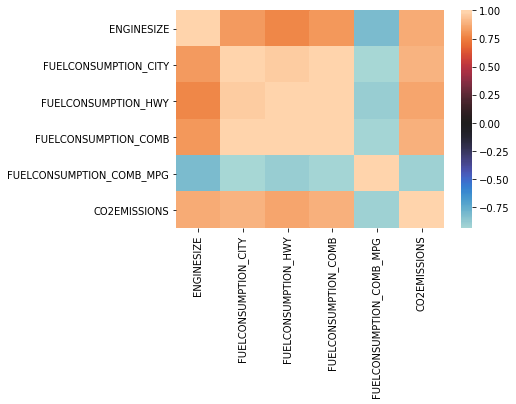

In [14]:
sns.heatmap(data.corr(),center=0)

In [15]:
data = pd.get_dummies(data)

In [16]:
print(data.shape)
data.head()

(1067, 55)


,ENGINESIZE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS,VEHICLECLASS_COMPACT,VEHICLECLASS_FULL-SIZE,VEHICLECLASS_MID-SIZE,VEHICLECLASS_MINICOMPACT,VEHICLECLASS_MINIVAN,VEHICLECLASS_PICKUP TRUCK - SMALL,VEHICLECLASS_PICKUP TRUCK - STANDARD,VEHICLECLASS_SPECIAL PURPOSE VEHICLE,VEHICLECLASS_STATION WAGON - MID-SIZE,VEHICLECLASS_STATION WAGON - SMALL,VEHICLECLASS_SUBCOMPACT,VEHICLECLASS_SUV - SMALL,VEHICLECLASS_SUV - STANDARD,VEHICLECLASS_TWO-SEATER,VEHICLECLASS_VAN - CARGO,VEHICLECLASS_VAN - PASSENGER,CYLINDERS_3,CYLINDERS_4,CYLINDERS_5,CYLINDERS_6,CYLINDERS_8,CYLINDERS_10,CYLINDERS_12,TRANSMISSION_A4,TRANSMISSION_A5,TRANSMISSION_A6,TRANSMISSION_A7,TRANSMISSION_A8,TRANSMISSION_A9,TRANSMISSION_AM5,TRANSMISSION_AM6,TRANSMISSION_AM7,TRANSMISSION_AS4,TRANSMISSION_AS5,TRANSMISSION_AS6,TRANSMISSION_AS7,TRANSMISSION_AS8,TRANSMISSION_AS9,TRANSMISSION_AV,TRANSMISSION_AV6,TRANSMISSION_AV7,TRANSMISSION_AV8,TRANSMISSION_M5,TRANSMISSION_M6,TRANSMISSION_M7,FUELTYPE_D,FUELTYPE_E,FUELTYPE_X,FUELTYPE_Z
0,2.0,9.9,6.7,8.5,33.0,196.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2.4,11.2,7.7,9.6,29.0,221.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,1.5,6.0,5.8,5.9,48.0,136.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,3.5,12.7,9.1,11.1,25.0,255.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,3.5,12.1,8.7,10.6,27.0,244.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 55 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ENGINESIZE                             1067 non-null   float64
 1   FUELCONSUMPTION_CITY                   1067 non-null   float64
 2   FUELCONSUMPTION_HWY                    1067 non-null   float64
 3   FUELCONSUMPTION_COMB                   1067 non-null   float64
 4   FUELCONSUMPTION_COMB_MPG               1067 non-null   float64
 5   CO2EMISSIONS                           1067 non-null   float64
 6   VEHICLECLASS_COMPACT                   1067 non-null   uint8  
 7   VEHICLECLASS_FULL-SIZE                 1067 non-null   uint8  
 8   VEHICLECLASS_MID-SIZE                  1067 non-null   uint8  
 9   VEHICLECLASS_MINICOMPACT               1067 non-null   uint8  
 10  VEHICLECLASS_MINIVAN                   1067 non-null   uint8  
 11  VEHI

In [18]:
## implementing models

In [19]:
X = data.drop(columns='CO2EMISSIONS')
X.shape

(1067, 54)

In [20]:
Y = data['CO2EMISSIONS']

In [21]:
from sklearn.model_selection import train_test_split, cross_val_score

In [22]:
seed = 1
test_s = 0.2
x_train,x_test, y_train, y_test = train_test_split(X,Y,test_size= test_s, random_state = seed)

In [23]:
print('Train Shape: ', x_train.shape)
print('Test Shape: ', x_test.shape)
print('Train Shape: ', y_train.shape)
print('Test Shape: ', y_test.shape)

Train Shape:  (853, 54)
Test Shape:  (214, 54)
Train Shape:  (853,)
Test Shape:  (214,)


In [24]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoLars, ElasticNet, BayesianRidge

In [25]:
linear = LinearRegression()
ridge = Ridge()
lasso = Lasso()
elastic = ElasticNet()
lassolars = LassoLars()
bayesianridge = BayesianRidge()

models = [linear,  ridge, lasso, elastic, lassolars, bayesianridge]

In [26]:
def get_cv_score(model):
  scores = cross_val_score(model,x_train,y_train, cv = 5, scoring='r2')
  print('CV Mean: ', np.mean(scores))
  print('STD: ', np.std(scores))
  print('\n')

In [27]:
for i in models:
  print(i)
  get_cv_score(i)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
CV Mean:  0.992383285254696
STD:  0.0007917494930525757


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
CV Mean:  0.9921741828727096
STD:  0.0006338137108278257


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
CV Mean:  0.978144301768779
STD:  0.003959424209936076


ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
CV Mean:  0.8905333622441276
STD:  0.012314554263932713


LassoLars(alpha=1.0, copy_X=True, eps=2.220446049250313e-16, fit_intercept=True,
          fit_path=True, max_iter=500, normalize=Tr

**Grid and Random Search**

In [28]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [29]:
## grid search does the same work that the above for loop did. 
## it also gives the flexibility to add parameters to the way these models process
## grid search will compute results for all parameters....this with a larges dataset can be a lot of computation
## hence we preform random search which only applies the model with some parameters and not all
## the combination of parameters are choosen at random
## thus random search effectively saves a lot of resources in real life

In [30]:
alpha = [0.5, 1, 1.5, 0.01, 2.5, 0.0001, 10, 100, 0.35]
solver = ['auto', 'svd']

params = dict(alpha = alpha, solver = solver)

In [31]:
grids = GridSearchCV(estimator = ridge, param_grid = params, scoring = 'r2', cv = 5)
grid_result = grids.fit(x_train, y_train)

In [32]:
grid_result.cv_results_

{'mean_fit_time': array([0.00813155, 0.0077703 , 0.00501971, 0.00774369, 0.00427165,
        0.0072968 , 0.00437346, 0.00743299, 0.00455565, 0.00840917,
        0.00449176, 0.00890641, 0.00436416, 0.00759301, 0.0058301 ,
        0.0075007 , 0.00431328, 0.01252384]),
 'mean_score_time': array([0.00300565, 0.00200539, 0.0017292 , 0.00189257, 0.00181413,
        0.00189486, 0.00183406, 0.00198593, 0.00188012, 0.0026794 ,
        0.00182328, 0.0020319 , 0.00174379, 0.00219231, 0.00236554,
        0.00201454, 0.00183353, 0.00200758]),
 'mean_test_score': array([0.99234728, 0.99234728, 0.99217418, 0.99217418, 0.99190681,
        0.99190681, 0.99238514, 0.99238514, 0.9911646 , 0.9911646 ,
        0.9923833 , 0.9923833 , 0.98253139, 0.98253139, 0.92843772,
        0.92843772, 0.99237649, 0.99237649]),
 'param_alpha': masked_array(data=[0.5, 0.5, 1, 1, 1.5, 1.5, 0.01, 0.01, 2.5, 2.5, 0.0001,
                    0.0001, 10, 10, 100, 100, 0.35, 0.35],
              mask=[False, False, False, Fals

In [33]:
df1 = pd.DataFrame(grid_result.cv_results_)
df1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008132,0.004315,0.003006,0.001525,0.5,auto,"{'alpha': 0.5, 'solver': 'auto'}",0.992786,0.991670,0.991280,0.992981,0.993020,0.992347,0.000727,7
1,0.007770,0.000759,0.002005,0.000064,0.5,svd,"{'alpha': 0.5, 'solver': 'svd'}",0.992786,0.991670,0.991280,0.992981,0.993020,0.992347,0.000727,7
2,0.005020,0.001422,0.001729,0.000033,1,auto,"{'alpha': 1, 'solver': 'auto'}",0.992735,0.991390,0.991407,0.992639,0.992700,0.992174,0.000634,9
3,0.007744,0.000871,0.001893,0.000047,1,svd,"{'alpha': 1, 'solver': 'svd'}",0.992735,0.991390,0.991407,0.992639,0.992700,0.992174,0.000634,9
4,0.004272,0.000085,0.001814,0.000145,1.5,auto,"{'alpha': 1.5, 'solver': 'auto'}",0.992567,0.991044,0.991467,0.992162,0.992294,0.991907,0.000564,11
5,0.007297,0.000201,0.001895,0.000083,1.5,svd,"{'alpha': 1.5, 'solver': 'svd'}",0.992567,0.991044,0.991467,0.992162,0.992294,0.991907,0.000564,12
6,0.004373,0.000106,0.001834,0.000078,0.01,auto,"{'alpha': 0.01, 'solver': 'auto'}",0.992635,0.991889,0.991099,0.993121,0.993181,0.992385,0.000792,1
7,0.007433,0.000040,0.001986,0.000062,0.01,svd,"{'alpha': 0.01, 'solver': 'svd'}",0.992635,0.991889,0.991099,0.993121,0.993181,0.992385,0.000792,2
8,0.004556,0.000298,0.001880,0.000111,2.5,auto,"{'alpha': 2.5, 'solver': 'auto'}",0.991987,0.990188,0.991415,0.990932,0.991301,0.991165,0.000594,14
9,0.008409,0.000632,0.002679,0.000708,2.5,svd,"{'alpha': 2.5, 'solver': 'svd'}",0.991987,0.990188,0.991415,0.990932,0.991301,0.991165,0.000594,13


In [34]:
df1[['rank_test_score','param_alpha','params','mean_score_time','mean_test_score']].sort_values('rank_test_score')

,rank_test_score,param_alpha,params,mean_score_time,mean_test_score
6,1,0.01,"{'alpha': 0.01, 'solver': 'auto'}",0.001834,0.992385
7,2,0.01,"{'alpha': 0.01, 'solver': 'svd'}",0.001986,0.992385
10,3,0.0001,"{'alpha': 0.0001, 'solver': 'auto'}",0.001823,0.992383
11,4,0.0001,"{'alpha': 0.0001, 'solver': 'svd'}",0.002032,0.992383
16,5,0.35,"{'alpha': 0.35, 'solver': 'auto'}",0.001834,0.992376
17,6,0.35,"{'alpha': 0.35, 'solver': 'svd'}",0.002008,0.992376
0,7,0.5,"{'alpha': 0.5, 'solver': 'auto'}",0.003006,0.992347
1,7,0.5,"{'alpha': 0.5, 'solver': 'svd'}",0.002005,0.992347
3,9,1,"{'alpha': 1, 'solver': 'svd'}",0.001893,0.992174
2,9,1,"{'alpha': 1, 'solver': 'auto'}",0.001729,0.992174


In [35]:
rnds = RandomizedSearchCV(estimator = ridge, param_distributions = params, scoring='r2', cv = 10, n_iter=4)
rnds_result = rnds.fit(x_train, y_train)

In [36]:
df2 = pd.DataFrame(rnds_result.cv_results_)
df2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_solver,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008862,0.002159,0.002296,0.000527,svd,10,"{'solver': 'svd', 'alpha': 10}",0.981983,0.988572,0.984534,0.980721,0.990700,0.986213,0.979584,0.983236,0.978457,0.987148,0.984115,0.003826,3
1,0.004790,0.000753,0.001800,0.000051,auto,2.5,"{'solver': 'auto', 'alpha': 2.5}",0.991594,0.993296,0.992355,0.988904,0.995144,0.988060,0.990550,0.992358,0.990403,0.993222,0.991589,0.002038,2
2,0.004929,0.001011,0.001805,0.000080,auto,100,"{'solver': 'auto', 'alpha': 100}",0.917484,0.945752,0.938587,0.924922,0.954883,0.946014,0.921862,0.920842,0.911897,0.942490,0.932473,0.013973,4
3,0.007941,0.000377,0.002056,0.000137,svd,0.0001,"{'solver': 'svd', 'alpha': 0.0001}",0.992437,0.993638,0.994291,0.990184,0.995934,0.986642,0.992649,0.993513,0.993332,0.994046,0.992666,0.002446,1


In [37]:
df2[['rank_test_score','param_alpha','params','mean_score_time','mean_test_score']].sort_values('rank_test_score')

,rank_test_score,param_alpha,params,mean_score_time,mean_test_score
3,1,0.0001,"{'solver': 'svd', 'alpha': 0.0001}",0.002056,0.992666
1,2,2.5,"{'solver': 'auto', 'alpha': 2.5}",0.001800,0.991589
0,3,10,"{'solver': 'svd', 'alpha': 10}",0.002296,0.984115
2,4,100,"{'solver': 'auto', 'alpha': 100}",0.001805,0.932473


In [38]:
#best score
print('best score for grid:', grid_result.best_score_)
print('best score for random:',rnds_result.best_score_)
#parameters that give best score
print('best list of hyper-params for grid:', grid_result.best_params_)
print('best list of hyper-params for random:',rnds_result.best_params_)

best score for grid: 0.9923851381966641
best score for random: 0.9926664506200717
best list of hyper-params for grid: {'alpha': 0.01, 'solver': 'auto'}
best list of hyper-params for random: {'solver': 'svd', 'alpha': 0.0001}


In [39]:
## applying the best model

from sklearn.metrics import r2_score
bayesianridge.fit(x_train, y_train)
y_train_pred = bayesianridge.predict(x_train)
accuracy_train = r2_score(y_train, y_train_pred)
print("Train accuracy: ",accuracy_train*100,"%")
y_pred = bayesianridge.predict(x_test)
accuracy_test = r2_score(y_test, y_pred)
print("Test Accuracy: ",accuracy_test*100,"%")

Train accuracy:  99.34965894687357 %
Test Accuracy:  99.21288657232955 %


**Classification**


In [40]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

In [41]:
iris = load_iris()
data = np.c_[iris.data, iris.target]
columns = np.append(iris.feature_names, ["target"])
iris2 = pd.DataFrame(data, columns=columns)
iris2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [42]:
iris2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [43]:
X = iris2.iloc[:,0:4]
iris2['target'] = pd.Categorical(pd.factorize(iris2['target'])[0])
Y = iris2['target']
print(X.head())
print(Y.head())
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(iris2['target'].unique())
Y = le.transform(Y)


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
0    0
1    0
2    0
3    0
4    0
Name: target, dtype: category
Categories (3, int64): [0, 1, 2]


In [44]:
seed = 8
test_size = 0.2
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
logi = LogisticRegression(random_state=0)
model = logi.fit(X_train,Y_train)


In [47]:
pred = model.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,pred)

0.9

In [49]:
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
logistics = linear_model.LogisticRegression()
sgd = linear_model.SGDClassifier()
passagg = linear_model.PassiveAggressiveClassifier()
ridgecv = linear_model.RidgeClassifierCV()
ridgeclass = linear_model.RidgeClassifier()

In [50]:
models_churn = [logistics,sgd,passagg,ridgecv,ridgeclass]

In [51]:
def get_cv_scores(model):
    scores = cross_val_score(model, X_train, Y_train, cv=5, scoring='accuracy')
    print(scores)
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

for i in models_churn:
    print(i)
    get_cv_scores(i)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
[1.         0.95833333 0.95833333 1.         0.95833333]
CV Mean:  0.975
STD:  0.02041241452319313


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
[0.95833333 0.79166667 0.79166667 0.95833333 0.70833333]
CV Mean:  0.8416666666666666
STD:  0.10000000000000002


PassiveAggressiveClassifier(C=1.0, 

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [52]:
get_cv_scores(logistics)

[1.         0.95833333 0.95833333 1.         0.95833333]
CV Mean:  0.975
STD:  0.02041241452319313




/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [53]:
penalty = ['l1', 'l2']
C = [0.0001, 0.001, 0.01]
class_weight = [{1:0.5, 0:0.5}, {1:0.6, 0:0.4}]
solver = ['liblinear', 'saga'] 

paramgrid = dict(penalty=penalty, C=C, class_weight=class_weight, solver=solver)

grid = GridSearchCV(estimator=logistics, param_grid=paramgrid, scoring='accuracy', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, Y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    1.9s finished
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [54]:
df2 = pd.DataFrame(grid_result.cv_results_)
df2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_class_weight,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004332,0.001566,0.001389,0.000091,0.0001,"{1: 0.5, 0: 0.5}",l1,liblinear,"{'C': 0.0001, 'class_weight': {1: 0.5, 0: 0.5}...",0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.000000,5
1,0.004400,0.001130,0.001305,0.000074,0.0001,"{1: 0.5, 0: 0.5}",l1,saga,"{'C': 0.0001, 'class_weight': {1: 0.5, 0: 0.5}...",0.333333,0.333333,0.333333,0.333333,0.291667,0.325000,0.016667,9
2,0.003967,0.001235,0.001291,0.000048,0.0001,"{1: 0.5, 0: 0.5}",l2,liblinear,"{'C': 0.0001, 'class_weight': {1: 0.5, 0: 0.5}...",0.333333,0.333333,0.333333,0.333333,0.291667,0.325000,0.016667,9
3,0.011762,0.002075,0.002293,0.001634,0.0001,"{1: 0.5, 0: 0.5}",l2,saga,"{'C': 0.0001, 'class_weight': {1: 0.5, 0: 0.5}...",0.333333,0.333333,0.333333,0.333333,0.291667,0.325000,0.016667,9
4,0.002752,0.000210,0.001180,0.000076,0.0001,"{1: 0.6, 0: 0.4}",l1,liblinear,"{'C': 0.0001, 'class_weight': {1: 0.6, 0: 0.4}...",0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.000000,5
5,0.003377,0.000218,0.001224,0.000044,0.0001,"{1: 0.6, 0: 0.4}",l1,saga,"{'C': 0.0001, 'class_weight': {1: 0.6, 0: 0.4}...",0.333333,0.333333,0.333333,0.333333,0.291667,0.325000,0.016667,9
6,0.002780,0.000191,0.001331,0.000335,0.0001,"{1: 0.6, 0: 0.4}",l2,liblinear,"{'C': 0.0001, 'class_weight': {1: 0.6, 0: 0.4}...",0.333333,0.333333,0.333333,0.333333,0.291667,0.325000,0.016667,9
7,0.008724,0.001909,0.001358,0.000071,0.0001,"{1: 0.6, 0: 0.4}",l2,saga,"{'C': 0.0001, 'class_weight': {1: 0.6, 0: 0.4}...",0.333333,0.333333,0.333333,0.333333,0.291667,0.325000,0.016667,9
8,0.004250,0.003558,0.001186,0.000098,0.001,"{1: 0.5, 0: 0.5}",l1,liblinear,"{'C': 0.001, 'class_weight': {1: 0.5, 0: 0.5},...",0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.000000,5
9,0.003070,0.000189,0.001151,0.000027,0.001,"{1: 0.5, 0: 0.5}",l1,saga,"{'C': 0.001, 'class_weight': {1: 0.5, 0: 0.5},...",0.333333,0.333333,0.333333,0.333333,0.291667,0.325000,0.016667,9


In [55]:
df2[['rank_test_score','params','mean_score_time','mean_test_score']].sort_values('rank_test_score')

,rank_test_score,params,mean_score_time,mean_test_score
23,1,"{'C': 0.01, 'class_weight': {1: 0.6, 0: 0.4}, ...",0.001356,0.666667
19,2,"{'C': 0.01, 'class_weight': {1: 0.5, 0: 0.5}, ...",0.001378,0.658333
18,2,"{'C': 0.01, 'class_weight': {1: 0.5, 0: 0.5}, ...",0.001873,0.658333
22,2,"{'C': 0.01, 'class_weight': {1: 0.6, 0: 0.4}, ...",0.001430,0.658333
12,5,"{'C': 0.001, 'class_weight': {1: 0.6, 0: 0.4},...",0.001216,0.333333
8,5,"{'C': 0.001, 'class_weight': {1: 0.5, 0: 0.5},...",0.001186,0.333333
0,5,"{'C': 0.0001, 'class_weight': {1: 0.5, 0: 0.5}...",0.001389,0.333333
4,5,"{'C': 0.0001, 'class_weight': {1: 0.6, 0: 0.4}...",0.001180,0.333333
7,9,"{'C': 0.0001, 'class_weight': {1: 0.6, 0: 0.4}...",0.001358,0.325000
21,9,"{'C': 0.01, 'class_weight': {1: 0.6, 0: 0.4}, ...",0.002432,0.325000
